In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NH3y1',
       'COy1','BPy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NOxy2', 'NH3y2',
       'COy2','BPy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NH3y3', 'COy3','BPy3',
        'ATy3','year', 'month', 'day']]
Y1 = df['NOx']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [9]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=3)

In [20]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=8,
                                      max_features=0.1,
                                      min_samples_split=2,
                                      min_samples_leaf=6,
                                      learning_rate=0.02)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.02, max_depth=8, max_features=0.1,
                          min_samples_leaf=6, n_estimators=2000)

In [21]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9999984445020859

Score on test data: -3.540767456636405

Root Mean Squared Error: 68.70045626314135

Overall model accuracy: -3.540767456636405


In [22]:
test=data.loc['207':'259']
X=test[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NH3y1',
       'COy1','BPy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NOxy2', 'NH3y2',
       'COy2','BPy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NH3y3', 'COy3','BPy3',
        'ATy3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NH3y1,COy1,BPy1,ATy1,PM2.5y2,PM1y2,...,PM1y3,NOy3,NO2y3,NH3y3,COy3,BPy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,32.607143,2.175714,992.431429,8.394286,217.428571,371.975714,...,416.398571,100.627143,83.730000,56.007143,2.998571,734.987143,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,29.011429,1.537714,991.651429,8.800000,264.292857,452.655714,...,332.717143,98.832857,67.225714,57.234286,3.004286,735.531429,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,31.015714,0.970000,990.642857,11.971429,191.864286,344.172857,...,282.434286,101.944286,57.842857,48.108571,2.867143,735.414286,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,28.408571,1.768000,991.448571,9.905714,237.660000,405.398571,...,346.604286,94.412857,75.028571,43.388571,2.740000,732.054286,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,23.565714,2.566000,993.708571,10.632857,173.172857,302.185714,...,237.858571,49.015714,68.434286,44.487143,1.844286,727.997143,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,23.558571,2.305429,990.021429,9.834286,143.550000,284.925714,...,251.350000,74.012857,62.091429,42.347143,2.127143,727.672857,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,22.507143,1.334286,995.670000,11.920000,193.068571,331.052857,...,328.171429,153.021429,66.960000,39.584286,2.754286,735.524286,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,27.225714,1.971429,991.444286,13.324286,109.957143,204.577143,...,279.338571,50.672857,67.874286,30.340000,1.890000,735.264286,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,27.742857,1.424286,994.125714,15.858571,166.732857,330.682857,...,275.608571,34.234286,82.401429,37.265714,1.715714,732.928571,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,27.334286,1.810714,991.534286,12.517143,109.975714,228.510000,...,280.377143,38.925714,62.438571,26.370000,1.704286,726.498571,17.097143,2020,3,1


In [23]:
predict=grad_boost.predict(X)

In [24]:
predict

array([150.95817507, 160.32937329, 148.91424167, 162.89346603,
       158.35247864, 183.6518161 , 149.25959983, 134.16562157,
       138.93497642, 159.87897629, 140.90132055, 129.27653608,
       122.78760573, 134.34679896, 128.23433791, 104.09000363,
       113.19481252, 144.49998891, 118.83898177, 147.946109  ,
       107.12182778, 112.80781024, 105.27997959,  83.20077504,
        86.72845745,  58.29038043,  71.46424475,  70.18645726,
        68.20398127,  48.85979574,  52.63458988,  57.14539314,
        51.81037395,  54.00429043,  54.93712482,  57.43235848,
        61.14934492,  62.97961629,  58.76361805,  83.29126346,
       135.6437234 , 160.99526988, 156.06069421, 180.67715272,
       183.20315275, 165.21736155, 222.48900833, 170.75506018,
       173.95551407, 237.09966727, 215.0657581 , 175.59933399,
       198.82368688])

In [25]:
dates=data.loc['207':'259','From Date']

In [26]:
X['From Date']=dates.values

In [27]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NH3y1', 'COy1', 'BPy1', 'ATy1',
       'PM2.5y2', 'PM1y2', 'NOy2', 'NOxy2', 'NH3y2', 'COy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NH3y3', 'COy3', 'BPy3', 'ATy3',
       'year', 'month', 'day', 'From Date'],
      dtype='object')

In [28]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [29]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [30]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [31]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

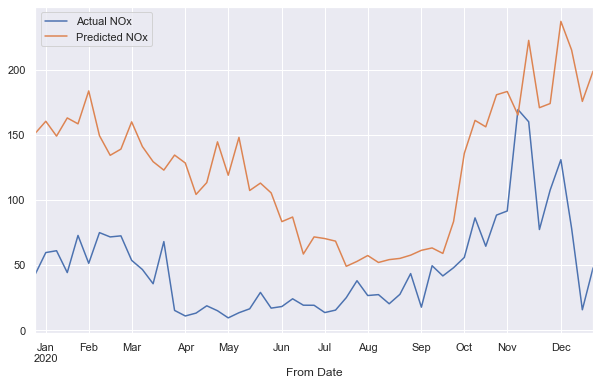

In [32]:
test['NOx'].plot(legend=True, label='Actual NOx', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NOx')

In [33]:
np.sqrt(mean_squared_error(test['NOx'],X['pred']))

85.7871829036487

In [34]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 58.12146804451426
MSE: 4719.752690763797
RMSE: 68.70045626314135
R-Squared: -3.540767456636405


In [35]:
mae = metrics.mean_absolute_error(test['NOx'],X['pred'])
mse = metrics.mean_squared_error(test['NOx'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NOx'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 76.81056049050368
MSE: 7359.440750544076
RMSE: 85.7871829036487
R-Squared: -4.646463451139806


In [36]:
import pickle
filename = 'NOx_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [37]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

-3.540767456636405


# 3rd plot

In [38]:
testcase = pd.DataFrame()

In [39]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [40]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [41]:
testcase

,test,pred,Corrected
155,144.901429,144.912038,76.211582
156,117.267143,176.728929,108.028473
157,100.144286,153.913417,85.212961
158,126.631429,140.155974,71.455518
159,52.171429,167.779193,99.078737
160,65.417143,174.088649,105.388192
161,80.275714,173.047882,104.347425
162,98.288571,131.679772,62.979315
163,96.087143,173.274499,104.574043
164,117.698571,137.461882,68.761425


In [42]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [43]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.2067681455901913

In [44]:
test2020=pd.DataFrame()

In [45]:
test2020['test']=test['NOx']
test2020['pred']=X['pred']

In [46]:
test2020.index=test.index

In [47]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

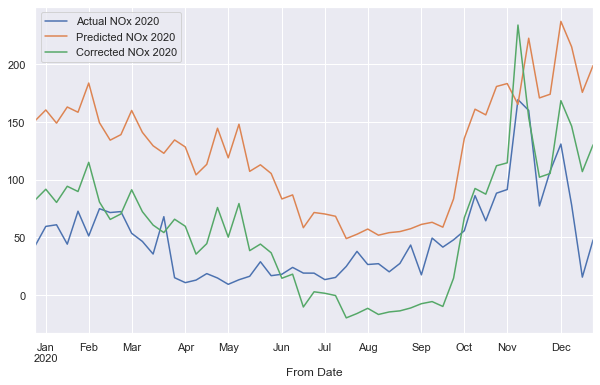

In [48]:
test2020['test'].plot(legend=True, label='Actual NOx 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NOx 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NOx 2020')

In [49]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.502286488991547